In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

# HOME C:/Users/ERIC/Desktop/T_S_Analysis/
# ORCA C:/Users/Operaciones F/T_S_Analysis/
data_mondays = pd.read_excel('C:/Users/ERIC/Desktop/T_S_Analysis/PML 09LBR LUNES HORORIO.xlsx', 2)
data = data_mondays.iloc[:,2:26].values
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,682.16,652.31,642.01,619.44,570.57,536.43,518.77,461.05,471.83,575.57,...,627.31,628.12,613.01,631.30,846.82,901.88,901.77,876.25,857.33,712.57
1,630.94,618.03,614.52,609.30,617.33,636.66,638.44,674.01,909.65,1065.46,...,1368.85,1376.99,1219.04,1275.73,1374.85,1388.05,1397.07,1326.98,1165.31,954.05
2,647.03,612.76,596.70,598.28,598.18,632.17,665.80,887.13,994.88,1129.31,...,1233.46,1226.30,1250.95,1174.55,1295.54,1355.34,1348.82,1300.63,1083.62,956.77
3,671.89,632.29,623.19,618.54,628.93,654.90,885.36,1035.01,1232.61,1426.27,...,1445.01,1212.23,1404.04,1413.11,1215.38,1353.83,1359.07,1450.02,1304.34,979.28
4,701.62,663.65,641.95,636.37,643.34,668.85,735.55,1112.81,1530.65,1692.90,...,1812.77,1806.37,1561.34,1781.05,1813.62,1823.03,1832.20,1832.15,1822.97,1384.81


In [7]:
daily_diff = data.diff()
autocorr = daily_diff[0].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorr)) 
#With negative autocorrelation it is called mean reverted


The autocorrelation of daily interest rate changes is -0.24


In [15]:
#95% confidence = +- 2/(N)^{2}
acf_array = acf(data[0])
print(acf_array)


[ 1.          0.63393571  0.43487996  0.40669061  0.37643437  0.36868624
  0.23526329  0.05366823  0.15515276  0.13304669  0.03621735  0.04524682
 -0.0654064  -0.06212413 -0.08583349 -0.17030673 -0.22885979 -0.31517207
 -0.34836214 -0.27439593 -0.28084806 -0.25922349 -0.21247194 -0.22763554
 -0.25901158 -0.28593344 -0.26664368 -0.17995577 -0.20218392 -0.19588868
 -0.16117842 -0.12080062 -0.07629473 -0.01798683  0.03886976  0.0888142
  0.10336639  0.0823239   0.07288792  0.05250181  0.0468102 ]


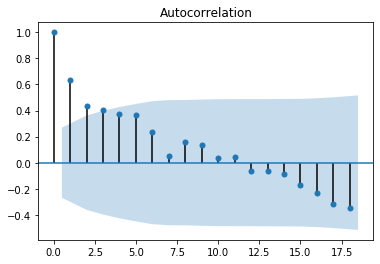

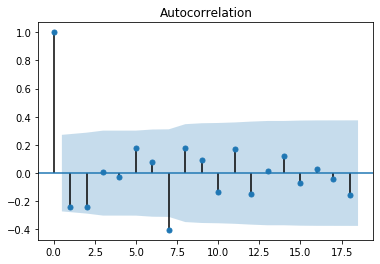

The approximate confidence interval is +/- 0.04


In [137]:
plot_acf(data[0])
plt.show()

daily_diff = daily_diff.dropna()
plot_acf(daily_diff[0])
plt.show()

#confidence interval
#95% confidence = +- 1.96/(N)^{2}
conf = 1.96/len(data[0])
print("The approximate confidence interval is +/- %4.2f" %(conf))

In [138]:
#White noise is a series with : constant mean and variance; zero autocorrelation at all lags

mean = np.mean(data[0])
std = np.std(data[0])
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))


The mean is 1281.581 and the standard deviation is 566.223


In [139]:
# Run the ADF test on the price series and print out the results
# if p<0.05 we can reject the hypothesis that series is a random walk
results = adfuller(data[0])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-3.40217851776457, 0.010884829897948874, 0, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 625.6935188893718)
The p-value of the test on prices is: 0.010884829897948874


In [140]:

data_ret = data[0].pct_change()


In [141]:
data_ret = data[0].pct_change()
data_ret = data_ret.dropna()
results = adfuller(data_ret)
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 7.061204695415799e-17


In [142]:
#Stationarity is strong when the entire distribution of data is time time-invariant
# and it is weak when mean, variance, and autocorrelation are time-invariant (i.e seasonal series, random walk)
#white noise  could be a nonstationarity serie id the mean is increasing as the time goes by

mod = ARMA(data[0], order = (1,0))
res = mod.fit()
print(res.summary())
#print("Phi:", res.params)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   53
Model:                     ARMA(1, 0)   Log Likelihood                -397.398
Method:                       css-mle   S.D. of innovations            434.514
Date:                Tue, 10 Mar 2020   AIC                            800.795
Time:                        12:42:58   BIC                            806.706
Sample:                             0   HQIC                           803.068
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1258.6992    159.337      7.900      0.000     946.405    1570.994
ar.L1.y        0.6365      0.104      6.102      0.000       0.432       0.841
                                    Roots           

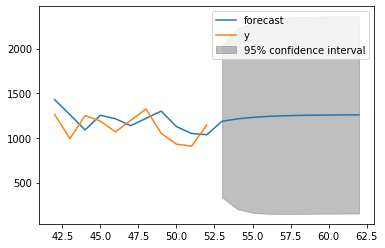

In [143]:
res.plot_predict(start=42, end=62)
plt.show()

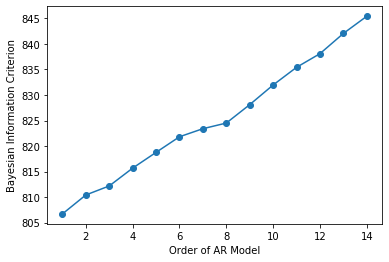

In [144]:
#The partial ACF measures the incremental benefit of addign another lag
#Two common adjusted goodness-of-fit measures are called 
#AIC Akaike Information Criteria
#Bayesian Information Criteria
# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(15)
for p in range(15):
    mod = ARMA(data[0], order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,15), BIC[1:15], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

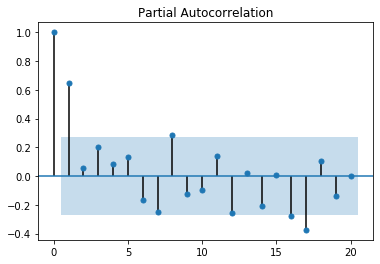

In [145]:
plot_pacf(data[0], lags=20)
plt.show()

In [146]:
# MA MODEL
#NEGATIVE theta = one-period mean reversion
#POSITIVE theta = one-perior momentum
# ONE-PERIOD AUTOCORRELATION IS THETA/ (1 + (THEHA)^{2})
#THETA DOES NOT NEED TO CHANGE ITS SIGN 
#ESTIMATING AN MA MODEL

mod = ARMA(data[0], order = (0,1))
res = mod.fit()
print(res.summary())
#print("Phi:", res.params)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   53
Model:                     ARMA(0, 1)   Log Likelihood                -401.036
Method:                       css-mle   S.D. of innovations            466.124
Date:                Tue, 10 Mar 2020   AIC                            808.073
Time:                        12:43:30   BIC                            813.984
Sample:                             0   HQIC                           810.346
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1277.9273     98.317     12.998      0.000    1085.230    1470.625
ma.L1.y        0.5457      0.096      5.683      0.000       0.358       0.734
                                    Roots           

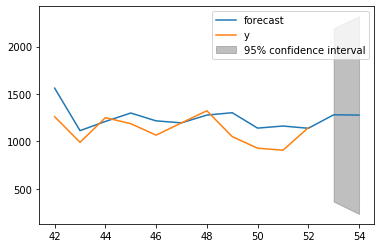

42    1561.253563
43    1114.075571
44    1210.862772
45    1299.526418
46    1216.816414
47    1196.012526
48    1277.833094
49    1302.811642
50    1140.621772
51    1162.577118
52    1138.877850
53    1280.973694
54    1277.927250
dtype: float64

In [149]:
res.plot_predict(start=42, end=54)
plt.show()
res.predict(start=42, end=54)

In [101]:
#ESTIMATING AN ARMA MODEL

mod_ar11 = ARMA(data[0], order = (1,1))
res11 = mod_ar11.fit()
mod_ar1 = ARMA(data[0], order = (1,0))
res1 =mod_ar1.fit()
mod_ar2 = ARMA(data[0], order = (2,0))
res2 = mod_ar2.fit()
print("\nAIC ARMA(1,1): ",res11.aic , "\nAIC ARMA(1,0): ",res1.aic , "\nAIC ARMA(2,0) ", res2.aic )





AIC ARMA(1,1):  802.0207663883442 
AIC ARMA(1,0):  800.7951635858532 
AIC ARMA(1,1)  802.5353282471061
